In [ ]:
!git clone https://github.com/StudentsDataHack-2022/dataset-2022.git
!unzip 'dataset-2022/Prediction task dataset.csv.zip'

fatal: destination path 'dataset-2022' already exists and is not an empty directory.
Archive:  dataset-2022/Prediction task dataset.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.model_selection import train_test_split


TRAIN_DATA = 'train.csv'

In [ ]:
df = pd.read_csv(TRAIN_DATA)
data_transformers = []

# Dataset analysis

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [ ]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [ ]:
missing_values = df.isnull().sum()
missing_str =  missing_values[missing_values > 0]\
    .sort_values(ascending=False)\
    .apply(lambda x: "{:.2f}%".format(x/len(df)*100))

missing_data = pd.concat([missing_str,df.dtypes], axis=1, join='inner')
missing_data.columns = ["missing_values_percentage", "data_type"]
missing_data

,missing_values_percentage,data_type
host_response_rate,24.69%,object
review_scores_rating,22.56%,float64
first_review,21.41%,object
last_review,21.36%,object
thumbnail_url,11.09%,object
neighbourhood,9.27%,object
zipcode,1.30%,object
bathrooms,0.27%,float64
host_has_profile_pic,0.25%,object
host_identity_verified,0.25%,object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04cc9a4910>,
      dtype=object)

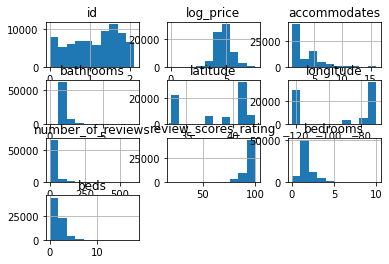

In [ ]:
df.hist()

In [ ]:
df['city'].value_counts() 

NYC        32349
LA         22453
SF          6434
DC          5688
Chicago     3719
Boston      3468
Name: city, dtype: int64

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
id,1.000000,-0.007178,-0.005759,-0.003951,-0.003059,-0.003021,-0.001379,0.002945,0.000307,-0.007521,-0.008665
log_price,-0.007178,1.000000,0.567574,0.355420,0.111191,-0.002193,-0.047529,-0.032470,0.091219,0.473212,0.442153
accommodates,-0.005759,0.567574,1.000000,0.505632,0.182306,-0.078309,-0.085160,0.041964,-0.017128,0.709258,0.810801
bathrooms,-0.003951,0.355420,0.505632,1.000000,0.053784,-0.137959,-0.135026,-0.041381,0.010537,0.589935,0.525591
cleaning_fee,-0.003059,0.111191,0.182306,0.053784,1.000000,-0.060913,-0.068505,0.110204,0.034879,0.105454,0.131632
latitude,-0.003021,-0.002193,-0.078309,-0.137959,-0.060913,1.000000,0.896065,-0.017642,-0.032858,-0.059162,-0.080294
longitude,-0.001379,-0.047529,-0.085160,-0.135026,-0.068505,0.896065,1.000000,-0.050009,-0.048801,-0.076113,-0.082150
number_of_reviews,0.002945,-0.032470,0.041964,-0.041381,0.110204,-0.017642,-0.050009,1.000000,0.011708,-0.035149,0.031109
review_scores_rating,0.000307,0.091219,-0.017128,0.010537,0.034879,-0.032858,-0.048801,0.011708,1.000000,0.011143,-0.027330
bedrooms,-0.007521,0.473212,0.709258,0.589935,0.105454,-0.059162,-0.076113,-0.035149,0.011143,1.000000,0.709416


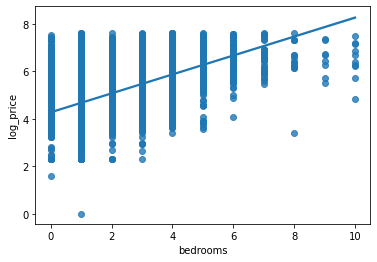

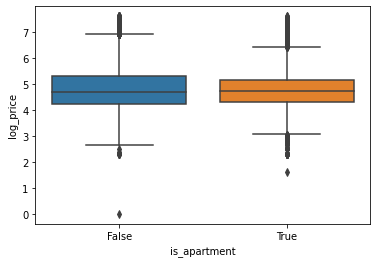

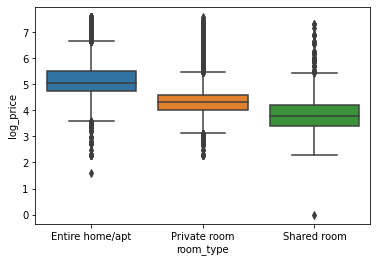

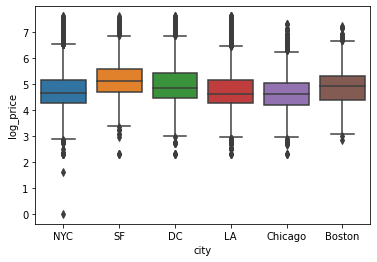

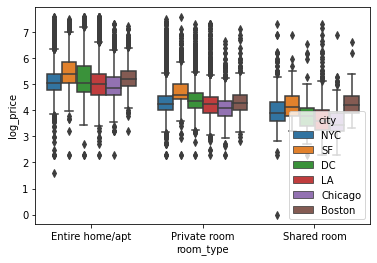

In [ ]:
sns.regplot(data=df, x='bedrooms', y='log_price')
plt.show()

vis = df.copy()
vis['is_apartment'] = vis['property_type'] == 'Apartment'


sns.boxplot(data=vis, x='is_apartment', y='log_price')
plt.show()

sns.boxplot(data=vis, x='room_type', y='log_price')
plt.show()


sns.boxplot(data=vis, x='city', y='log_price', )
plt.show()


sns.boxplot(data=vis, x='room_type', y='log_price', hue='city')
plt.show()

# Feature Transformation

## Amenities

In [ ]:
class AmenitiesExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, popularity_threshold=0.2):
        self.all_amenities = []
        self.popularity_threshold = popularity_threshold
        self.columns_to_keep = set()

    def get_amenities_list(self, amenities_string):
        no_brackets = amenities_string.replace('{', '').replace('}', '')
        no_quotes = no_brackets.replace('"', '') 
        
        amenities_list = no_quotes.split(',')

        return [amenity.strip().lower() for amenity in amenities_list if amenity.strip()]
        
    def fit(self, X, y=None):
        amenities_per_row = X.amenities.apply(self.get_amenities_list)

        all_amenities_set = set()
        for amenities_row in amenities_per_row:
            all_amenities_set.update(amenities_row)

        self.all_amenities = list(all_amenities_set)
        amenities_df_dict = {amenity:[] for amenity in self.all_amenities}

        for amenity_row in amenities_per_row:
            for checked_amenity in self.all_amenities:
                amenities_df_dict[checked_amenity].append(True if checked_amenity in amenity_row else False)

        amenities_df_raw = pd.DataFrame(amenities_df_dict)

        amenity_popularities = amenities_df_raw.sum()

        columns_to_keep = set()
        for col_name, popularity in amenity_popularities.items():
            if popularity > len(X)*self.popularity_threshold:
                columns_to_keep.add(col_name)
        
        self.columns_to_keep = columns_to_keep
        
        return self

    def transform(self, X):
        amenities_per_row = df.amenities.apply(self.get_amenities_list)
        amenities_df_dict = {amenity:[] for amenity in self.all_amenities}

        for amenity_row in amenities_per_row:
            for checked_amenity in self.all_amenities:
                amenities_df_dict[checked_amenity].append(True if checked_amenity in amenity_row else False)

        amenities_df_raw = pd.DataFrame(amenities_df_dict)

        amenities_chosen = amenities_df_raw[self.columns_to_keep]
        rename_dict = {colname: f"amenity:{colname}" for colname in amenities_chosen.columns}

        amenities_clean = amenities_chosen.rename(columns=rename_dict)

        amenities_clean['other_amenities'] = amenities_per_row.apply(len) - amenities_clean.sum(axis=1)
        X = X.join(amenities_clean)
        X['number_of_amenities'] = amenities_per_row.apply(len)
        return X.drop('amenities', axis=1)

## Categorical values mapping

In [ ]:
class CategoricalMapper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        value_mappings =  {
            "host_has_profile_pic": {'t':True, 'f':False},
            "host_identity_verified": {'t':True, 'f':False},
            "instant_bookable": {'t':True, 'f':False},
            "cancellation_policy": {
                'flexible': 0,
                'moderate': 1,
                'strict': 2,
                'super_strict_30': 3,
                'super_strict_60': 3,
            },
        }

        for col_name, value_mapping in value_mappings.items():
            desired_type = type(list(value_mapping.values())[0])
            
            X[f'parsed_{col_name}'] = X[col_name]\
                .map(value_mapping)\
                .astype(desired_type)
            
        return X.drop(value_mappings.keys(), axis=1)

## Dates mapping


In [ ]:
class DatesMapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.max_date = None

    def fit(self, X, y=None):
        for col in ['last_review', 'first_review', 'host_since']:
            X[col] = pd.to_datetime(X[col])
            X[col].fillna(method = 'ffill', inplace = True)
        
        self.max_date = max(X['last_review'].max(), X['host_since'].max())
        return self

    def transform(self, X):
        for col in ['last_review', 'first_review', 'host_since']:
            X[col] = pd.to_datetime(X[col])
            X[col].fillna(method = 'ffill', inplace = True)

        X['days_last_max'] = (self.max_date - X['last_review']).dt.days
        X['days_since_max'] = (self.max_date - X['host_since']).dt.days

        return X.drop(['first_review', 'last_review', 'host_since'], axis=1)

## Host response rate float map


In [ ]:
class ResponseRateTypeMapper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['host_response_rate_mapped'] = X['host_response_rate']\
            .apply(lambda x: x.replace('%','') if isinstance(x, str) else None)\
            .astype(float)
        
        return X.drop('host_response_rate', axis=1)

## Angle distance from center

In [ ]:
class AngleDistanceFromCenterGetter(BaseEstimator, TransformerMixin):
    city_coordinates = { # lat. long
        'NYC': (40.785091, -73.968285),        
        'LA': (34.056458, -118.247131),
        'SF': (37.773972, -122.431297),        
        'DC': (38.889805, -77.009056),
        'Chicago': (41.882702, -87.619392),
        'Boston': (42.361145, -71.057083),      
    }

    def fit(self, X, y=None):
        return self

    def get_angle_distance_from_center(self, row):
        city = row['city']

        if not city or city not in self.city_coordinates.keys():
            return None
            
        if not row['latitude'] or not row['longitude']:
            return None

        final_dest = self.city_coordinates[city]

        lat_distance = final_dest[0] - row['latitude']
        long_distance = final_dest[1] - row['longitude']
        
        return lat_distance*lat_distance + long_distance*long_distance

    def transform(self, X):
        X['square_distance_from_center'] = X.apply(self.get_angle_distance_from_center, axis = 1)

        return X.copy()

## Text fields handling

In [ ]:
class TextLengthTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['name_length'] = X['name'].apply(len)
        X['description_length'] = X['description'].apply(len)

        return X.drop(['name', 'description'], axis=1)

### Column Dropping


In [ ]:
DEFAULT_COLUMNS_TO_DROP = ['thumbnail_url', 'neighbourhood', 'zipcode', 'id']

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=DEFAULT_COLUMNS_TO_DROP):
        self.columns_to_drop=columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.columns_to_drop, axis=1)

### Handle imputing

In [ ]:
class MissingDataImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.numerical_imputer  = None
        self.categorical_imputer = None

        self.only_numerical_cols = None
        self.only_categorical_cols = None

    def fit(self, X, y=None):
        self.only_numerical_cols = list(X.dtypes[X.dtypes != 'object'].index)
        numerical_df = X[self.only_numerical_cols].astype(float)

        self.numerical_imputer = IterativeImputer(initial_strategy='mean') #SimpleImputer(strategy='median') # IterativeImputer(initial_strategy='mean'))
        self.numerical_imputer.fit(numerical_df)

        self.only_categorical_cols = list(X.dtypes[X.dtypes == 'object'].index)
        categorical_df = X[self.only_categorical_cols]

        self.categorical_imputer = SimpleImputer(strategy='most_frequent')
        self.categorical_imputer.fit(categorical_df)

        return self

    def transform(self, X):
        numerical_df = X[self.only_numerical_cols].astype(float)
        categorical_df = X[self.only_categorical_cols]


        numerical_generated = pd.DataFrame(
            self.numerical_imputer.transform(numerical_df), 
            columns=numerical_df.columns)
        
        categorical_generated = pd.DataFrame(
            self.categorical_imputer.transform(categorical_df), 
            columns=categorical_df.columns)

        return numerical_generated.join(categorical_generated)

## OneHot encoding


In [ ]:
class CategoricalOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, popularity_threshold=0.03):
        self.columns_to_encode = None
        self.columns_to_keep = {}
        self.one_hot_encoders = {}
        self.popularity_threshold = popularity_threshold

    def fit(self, X, y=None):
        self.columns_to_encode = list(X.dtypes[X.dtypes == 'object'].index)

        for col_name in self.columns_to_encode:
            dummies = pd.get_dummies(data=X[col_name])

            min_examples = self.popularity_threshold*len(X)

            dummies_count = dummies.sum()

            self.columns_to_keep[col_name] = list(
                dummies_count[dummies_count > min_examples].index)

        return self

    def transform(self, X):
        for col_name in self.columns_to_encode:
            dummies = pd.get_dummies(data=X[col_name])

            for col_to_keep in self.columns_to_keep[col_name]:
                if col_to_keep not in dummies.columns:
                    dummies['col_to_keep'] = 0

            chosen_subset = dummies[self.columns_to_keep[col_name]]

            chosen_subset['other'] = abs(chosen_subset.sum(axis=1) -1)

            rename_dict = {dummy_name: f"{col_name}_{dummy_name}" for dummy_name in chosen_subset.columns}
            chosen_subset.rename(columns=rename_dict, inplace=True)
            X.drop(col_name, inplace=True, axis=1)
            X = X.join(chosen_subset)

        return X.copy()

In [ ]:
DEFAULT_COLUMNS_TO_KEEP = [
    'accommodates',
    'bathrooms',
    'number_of_reviews',
    'bedrooms',
    'beds',
    'amenity:cable tv',
    'parsed_cancellation_policy',
    'name_length',
    'description_length',
    'property_type_Apartment',
    'property_type_Condominium',
    'property_type_House',
    'room_type_Entire home/apt',
    'room_type_Private room',
    'room_type_other',
    'city_LA',
    'city_SF'
]

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_keep=DEFAULT_COLUMNS_TO_KEEP):
        self.columns_to_keep=columns_to_keep

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns_to_keep]

## Dataset normalization

In [ ]:
class NormalizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=DEFAULT_COLUMNS_TO_DROP):
        self.transformer = Normalizer()

    def fit(self, X, y=None):
        self.transformer.fit(X)
        return self

    def transform(self, X):
        return pd.DataFrame(self.transformer.transform(X), columns=X.columns)

In [ ]:
data_transformers = [
    AmenitiesExtractor(),
    CategoricalMapper(),
    DatesMapper(),
    ResponseRateTypeMapper(),
    AngleDistanceFromCenterGetter(),
    TextLengthTransformer(),
    ColumnDropper(),
    MissingDataImputer(),
    CategoricalOneHotEncoder(),
    # ColumnSelector(),
    NormalizerTransformer(),
]

def fit_transform_all(X, transformers_pipeline=data_transformers):
    for transformer in transformers_pipeline:
        transformer.fit(X.copy())
        X = transformer.transform(X.copy())
    return X 

def transform_all(X, transformers_pipeline=data_transformers):
    for transformer in transformers_pipeline:
        X = transformer.transform(X.copy())
    return X 


##### Train Test  splitting

In [ ]:
y = df['log_price']
X = df.drop('log_price', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_t_prep = fit_transform_all(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def test_model(model):
    X_test_prep = transform_all(X_test)

    y_pred = model.predict(X_test_prep)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))

# Pre-training analysis

In [ ]:
X_t_prep.join(y_train).corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,amenity:family/kid friendly,amenity:washer,amenity:smoke detector,amenity:wireless internet,amenity:air conditioning,amenity:dryer,amenity:heating,amenity:internet,amenity:shampoo,amenity:kitchen,amenity:iron,amenity:tv,amenity:translation missing: en.hosting_amenity_50,amenity:laptop friendly workspace,amenity:cable tv,amenity:essentials,amenity:carbon monoxide detector,amenity:translation missing: en.hosting_amenity_49,amenity:free parking on premises,amenity:fire extinguisher,amenity:hangers,amenity:hair dryer,amenity:first aid kit,other_amenities,number_of_amenities,parsed_host_has_profile_pic,parsed_host_identity_verified,parsed_instant_bookable,parsed_cancellation_policy,days_last_max,days_since_max,host_response_rate_mapped,square_distance_from_center,name_length,description_length,property_type_Apartment,property_type_Condominium,property_type_House,property_type_other,room_type_Entire home/apt,room_type_Private room,room_type_other,bed_type_Real Bed,bed_type_other,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,city_other,log_price
accommodates,1.000000,0.660905,0.376928,0.512746,-0.495890,0.006217,0.514501,0.775950,0.845437,0.502337,0.308086,0.399664,0.468511,0.405128,0.302260,0.441185,0.108816,0.344605,0.456737,0.363402,0.435607,-0.007419,0.334493,0.169819,0.450618,0.340833,-0.076486,0.278059,0.247542,0.398480,0.362883,0.214992,0.281831,0.523731,0.514761,0.057069,0.310547,0.337157,0.053894,-0.314166,0.504443,0.185637,0.478742,0.205426,0.225141,0.066136,0.212946,0.113129,0.571919,-0.060279,0.002660,0.523633,-0.048491,0.056957,0.087914,0.094421,0.188033,0.197180,0.036558,nan,0.006608
bathrooms,0.660905,1.000000,0.354922,0.708692,-0.693015,-0.063141,0.720733,0.728976,0.679660,0.373950,0.400381,0.503900,0.634343,0.490912,0.391872,0.558198,0.077739,0.375399,0.595471,0.355586,0.450343,0.163382,0.378582,0.121918,0.574042,0.377609,0.128596,0.306681,0.268364,0.464196,0.355237,0.254629,0.264696,0.589918,0.714447,0.027205,0.395438,0.287860,0.150588,-0.323956,0.679415,0.270009,0.608379,0.137268,0.301557,0.077649,0.324221,0.145385,0.335595,0.271655,0.170045,0.709666,-0.005833,0.083095,0.045015,0.095312,0.279673,0.296170,0.056544,nan,0.008279
cleaning_fee,0.376928,0.354922,1.000000,0.425050,-0.403546,0.046505,0.433171,0.319811,0.339171,0.261018,0.203737,0.376178,0.433882,0.337946,0.200096,0.398866,0.112777,0.322959,0.377499,0.339321,0.314693,0.126340,0.310940,0.109836,0.423374,0.334402,0.088070,0.161609,0.186817,0.385087,0.348024,0.194724,0.234832,0.452429,0.431818,0.109995,0.248555,0.456491,-0.016979,-0.300572,0.466170,0.112658,0.414209,0.242735,0.252465,0.044339,0.124802,0.036992,0.297702,0.096890,0.033452,0.423202,-0.010807,0.050380,0.039271,-0.016269,0.149345,0.216285,0.032857,nan,0.008070
latitude,0.512746,0.708692,0.425050,1.000000,-0.827673,-0.049872,0.971336,0.548617,0.517905,0.371284,0.369442,0.662890,0.855952,0.637280,0.358639,0.730548,0.025881,0.474225,0.785654,0.414126,0.527198,0.272924,0.444747,0.072275,0.759214,0.472487,0.237472,0.202801,0.260036,0.600330,0.420701,0.276624,0.305749,0.699623,0.971196,0.017916,0.527295,0.318835,0.145887,-0.415227,0.921256,0.221555,0.814428,0.162053,0.617578,0.085048,0.204980,0.128572,0.328903,0.500232,0.179641,0.947880,0.032472,0.173650,0.086523,0.088688,0.131635,0.593253,0.063252,nan,-0.000734
longitude,-0.495890,-0.693015,-0.403546,-0.827673,1.000000,0.044331,-0.888122,-0.523438,-0.496604,-0.383348,-0.451500,-0.595182,-0.750944,-0.472979,-0.438836,-0.620220,-0.103495,-0.468470,-0.678097,-0.369393,-0.495620,-0.272683,-0.413784,-0.071481,-0.662283,-0.415417,-0.242635,-0.410978,-0.270469,-0.539955,-0.395974,-0.278851,-0.246192,-0.647702,-0.884613,-0.047305,-0.477148,-0.276123,-0.232758,0.355003,-0.837241,-0.424863,-0.713417,-0.117601,-0.416942,-0.088490,-0.347124,-0.168805,-0.302137,-0.439013,-0.201959,-0.863990,-0.028621,-0.026643,-0.031194,0.000418,-0.595836,-0.17491

# Model selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rfr = RandomForestRegressor(n_estimators=50)
rfr.fit(X_t_prep, y_train)

test_model(rfr)

MAE: 0.38995494484032117
MSE: 0.27005208186250396


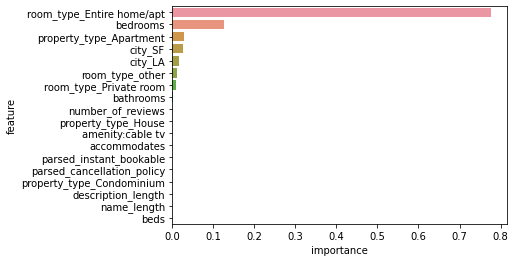

In [ ]:
importances = pd.Series(data=rfr.feature_importances_, index=X_t_prep.columns)

importance_df = pd.DataFrame(importances[importances > 0]
                                .sort_values(ascending=False)
                                .items(), 
                             columns=["feature", "importance"])

sns.barplot(data=importance_df, x="importance", y="feature")

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR

models = {
    "Gradient Boosting 200": GradientBoostingRegressor(n_estimators=200), 
    # "Gradient Boosting 120": GradientBoostingRegressor(n_estimators=120), 
    "Gradient Boosting 80": GradientBoostingRegressor(n_estimators=80), 
    "Random Forest 200": RandomForestRegressor(n_estimators=200),
    # "Random Forest 120": RandomForestRegressor(n_estimators=120),
    "Random Forest 80": RandomForestRegressor(n_estimators=80),
    # "SVR": SVR()
    "Lasso": Lasso(),
}

scoring_metrics = ('neg_mean_squared_error', 'neg_mean_absolute_error')
scores = {}

for name, model in models.items():
    scores[name] = cross_validate(
        model, X_t_prep, y_train, cv=3,
        scoring=scoring_metrics,
        return_train_score=True)
    
    print(name, scores[name])

Gradient Boosting 200 {'fit_time': array([103.38446927, 100.40125179,  98.8681519 ]), 'score_time': array([0.07559037, 0.07295346, 0.07105231]), 'test_neg_mean_squared_error': array([-0.19958311, -0.19246735, -0.19635813]), 'train_neg_mean_squared_error': array([-0.17951232, -0.18260141, -0.18042625]), 'test_neg_mean_absolute_error': array([-0.33708202, -0.33060108, -0.33036455]), 'train_neg_mean_absolute_error': array([-0.32049392, -0.32327053, -0.32233895])}
Gradient Boosting 80 {'fit_time': array([39.23875475, 39.12653661, 39.30632353]), 'score_time': array([0.04457593, 0.03562856, 0.0366528 ]), 'test_neg_mean_squared_error': array([-0.21025693, -0.20538448, -0.20911728]), 'train_neg_mean_squared_error': array([-0.19771146, -0.20237823, -0.20021087]), 'test_neg_mean_absolute_error': array([-0.34742105, -0.34276417, -0.34259235]), 'train_neg_mean_absolute_error': array([-0.33586715, -0.34049019, -0.33931281])}
Random Forest 200 {'fit_time': array([298.3522594 , 311.29913449, 298.5928

In [ ]:
def pretty(d, indent=0):
   for key, value in d.items():
      print('\t' * indent + str(key))
      if isinstance(value, dict):
         pretty(value, indent+1)
      else:
         print('\t' * (indent+1) + str(value))

pretty(scores)

Gradient Boosting 200
	fit_time
		[103.38446927 100.40125179  98.8681519 ]
	score_time
		[0.07559037 0.07295346 0.07105231]
	test_neg_mean_squared_error
		[-0.19958311 -0.19246735 -0.19635813]
	train_neg_mean_squared_error
		[-0.17951232 -0.18260141 -0.18042625]
	test_neg_mean_absolute_error
		[-0.33708202 -0.33060108 -0.33036455]
	train_neg_mean_absolute_error
		[-0.32049392 -0.32327053 -0.32233895]
Gradient Boosting 80
	fit_time
		[39.23875475 39.12653661 39.30632353]
	score_time
		[0.04457593 0.03562856 0.0366528 ]
	test_neg_mean_squared_error
		[-0.21025693 -0.20538448 -0.20911728]
	train_neg_mean_squared_error
		[-0.19771146 -0.20237823 -0.20021087]
	test_neg_mean_absolute_error
		[-0.34742105 -0.34276417 -0.34259235]
	train_neg_mean_absolute_error
		[-0.33586715 -0.34049019 -0.33931281]
Random Forest 200
	fit_time
		[298.3522594  311.29913449 298.59283447]
	score_time
		[1.65532303 1.60462189 1.60766912]
	test_neg_mean_squared_error
		[-0.18952679 -0.18103161 -0.18392277]
	train_

# Final model


In [ ]:
final_model = RandomForestRegressor(n_estimators=140)
final_model.fit(X_t_prep, y_train)
test_model(final_model)

MAE: 0.31162177337170394
MSE: 0.1790748373688674


In [ ]:
importances = pd.Series(data=final_model.feature_importances_, index=X_t_prep.columns)

importances[importances > 0].sort_values(ascending=False)

room_type_Entire home/apt                             0.364941
bedrooms                                              0.078238
square_distance_from_center                           0.044521
bathrooms                                             0.034982
accommodates                                          0.032504
number_of_reviews                                     0.028264
property_type_Apartment                               0.019710
days_last_max                                         0.019390
city_SF                                               0.019071
name_length                                           0.015370
host_response_rate_mapped                             0.015266
other_amenities                                       0.014577
days_since_max                                        0.014060
city_LA                                               0.013818
number_of_amenities                                   0.013128
description_length                                    0